In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [45]:
# Loading the cleaned data after preprocessing.
df = pd.read_csv("C:/Users/KRISHNA/Desktop/SHWETA/Fall 2024/Project/Cleaned_Loan_approval_dataset.csv")

In [46]:
# Combining the income from all the sources.
df['TotalIncome'] = (df['IncomeFromPrincipalEmployer'] + df['IncomeFromPension'] + 
                     df['IncomeFromFamilyAllowance'] + df['IncomeFromSocialWelfare'] + 
                     df['IncomeFromLeavePay'] + df['IncomeFromChildSupport'] + 
                     df['IncomeOther']+df['IncomeTotal'])

In [47]:
df.drop(['IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal'],axis=1,inplace=True)

In [48]:
# Summing up the liabilities.
df['TotalLiabilities'] = df['LiabilitiesTotal'] + df['ExistingLiabilities'] + df['RefinanceLiabilities']

In [49]:
df.drop([ 'ExistingLiabilities', 'LiabilitiesTotal',
       'RefinanceLiabilities'],axis=1,inplace=True)

In [50]:
df.columns

Index(['LoanNumber', 'UserName', 'NewCreditCustomer', 'VerificationType',
       'LanguageCode', 'Age', 'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'UseOfLoan', 'Education',
       'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'ExpectedReturn', 'ProbabilityOfDefault', 'Rating', 'Status',
       'Restructured', 'CreditScoreEsMicroL', 'CreditScoreEeMini',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'TotalIncome',
       'TotalLiabilities'],
      dtype='object')

# Considering the variables for predicting the loan amount

Considering the variables which are useful for predicting loan amount. This includes borrower's personal and financial aspects.

In [51]:
loan_estimate_features = ['NewCreditCustomer', 'VerificationType',
       'Age', 'Gender', 'AppliedAmount','Amount',
       'UseOfLoan', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType','TotalIncome', 'TotalLiabilities','DebtToIncome', 'FreeCash', 'Rating',
       'CreditScoreEsMicroL', 'CreditScoreEeMini',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan']

loan_df= df[loan_estimate_features]
loan_df.head()

,NewCreditCustomer,VerificationType,Age,Gender,AppliedAmount,Amount,UseOfLoan,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,TotalIncome,TotalLiabilities,DebtToIncome,FreeCash,Rating,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan
0,Existing_credit_customer,Income_expenses_verified,53,Female,2125.0,2125.0,Home_improvement,Retiree,0,Other,Owner,708.0,499.09,26.29,10.92,C,M,1000.0,1.0,500.0
1,Existing_credit_customer,Income_unverified,50,Female,3000.0,3000.0,Business,Entrepreneur,MoreThan5Years,Retail_and_wholesale,Owner,1800.0,740.45,30.58,78.80,B,M,1000.0,1.0,1800.0
2,New_credit_Customer,Income_expenses_verified,44,Male,10630.0,9100.0,Business,Entrepreneur,UpTo3Years,Transport_and_warehousing,Mortgage,2400.0,915.00,26.71,349.43,A,M,1000.0,0.0,0.0
3,New_credit_Customer,Income_verified,42,Male,1500.0,1500.0,Home_improvement,Fully-Employed,UpTo5Years,Other,Living_with_parents,1726.0,351.00,7.36,449.47,F,M3,1000.0,0.0,0.0
4,New_credit_Customer,Income_expenses_verified,34,Female,1595.0,1090.0,Other,Retiree,0,Other,Tenant_pre_furnished_property,1394.0,947.00,36.04,95.81,HR,M5,1000.0,0.0,0.0


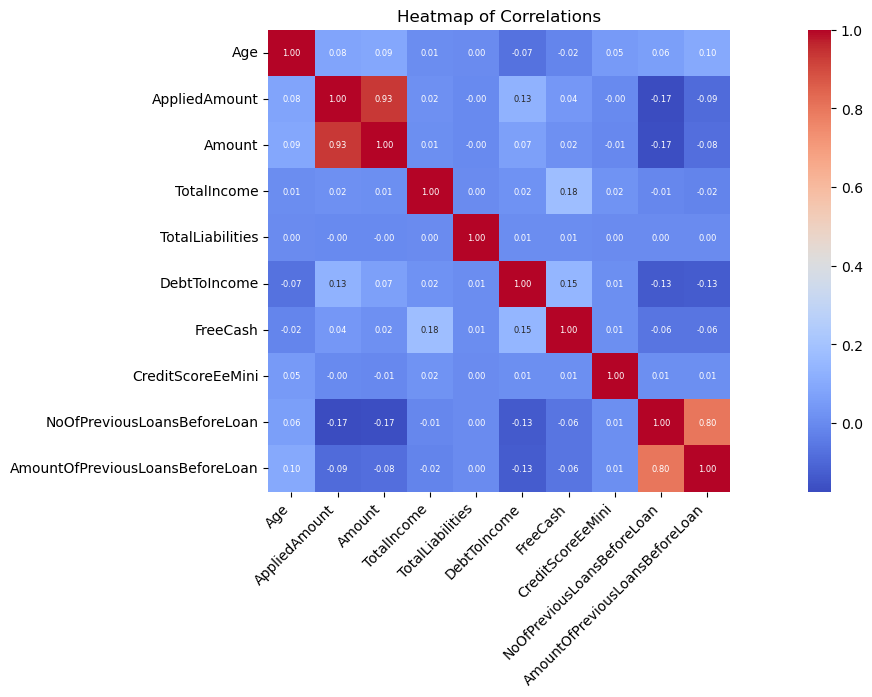

In [52]:
# Analysing the heatmap to find out relationships between the variables.

df1 = loan_df.select_dtypes(include=['number'])
# Calculating correlation matrix
correlation_matrix = df1.corr()

# Creating heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 6},fmt=".2f", square=True)
plt.title('Heatmap of Correlations')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)  
plt.show()

Inferences from the heatmap:
1. Higher loan amounts and applied amounts lead to higher monthly payments.
2. Amount of previous loans depend upon number of previous loans.
3. Loan amount granted strongly matches with the loan amount applied by the borrower.
4. Debt to income is determined from existing liabilites.
5. Free cash depends upon the total income.

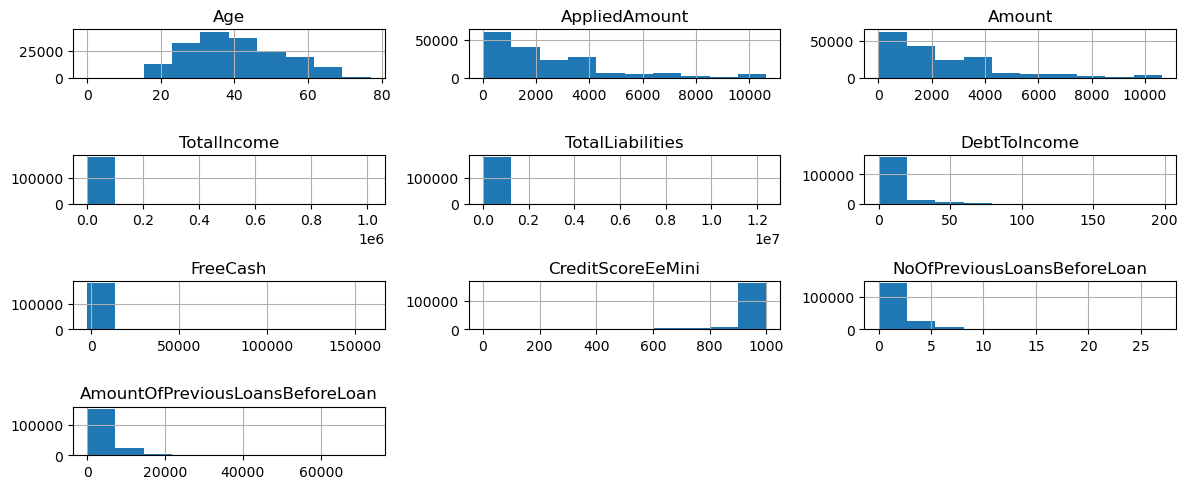

In [53]:
# Plotting histograms for all numerical variables to check the distribution of the variables.
df1.hist(figsize=(12, 5), bins=10)
plt.tight_layout()
plt.show()

In [54]:
loan_df.columns

Index(['NewCreditCustomer', 'VerificationType', 'Age', 'Gender',
       'AppliedAmount', 'Amount', 'UseOfLoan', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'TotalIncome', 'TotalLiabilities', 'DebtToIncome',
       'FreeCash', 'Rating', 'CreditScoreEsMicroL', 'CreditScoreEeMini',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan'],
      dtype='object')

In [55]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Getting the categorical columns.
categorical_columns = loan_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Loop through the categorical columns and apply LabelEncoder
for column in categorical_columns:
    loan_df[column] = label_encoder.fit_transform(loan_df[column])

C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_19720\3326494923.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df[column] = label_encoder.fit_transform(loan_df[column])
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_19720\3326494923.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df[column] = label_encoder.fit_transform(loan_df[column])
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_19720\3326494923.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [56]:
# Saving the LabelEncoder object.
import joblib
joblib.dump(label_encoder, 'loan_encoder.pkl')

['loan_encoder.pkl']

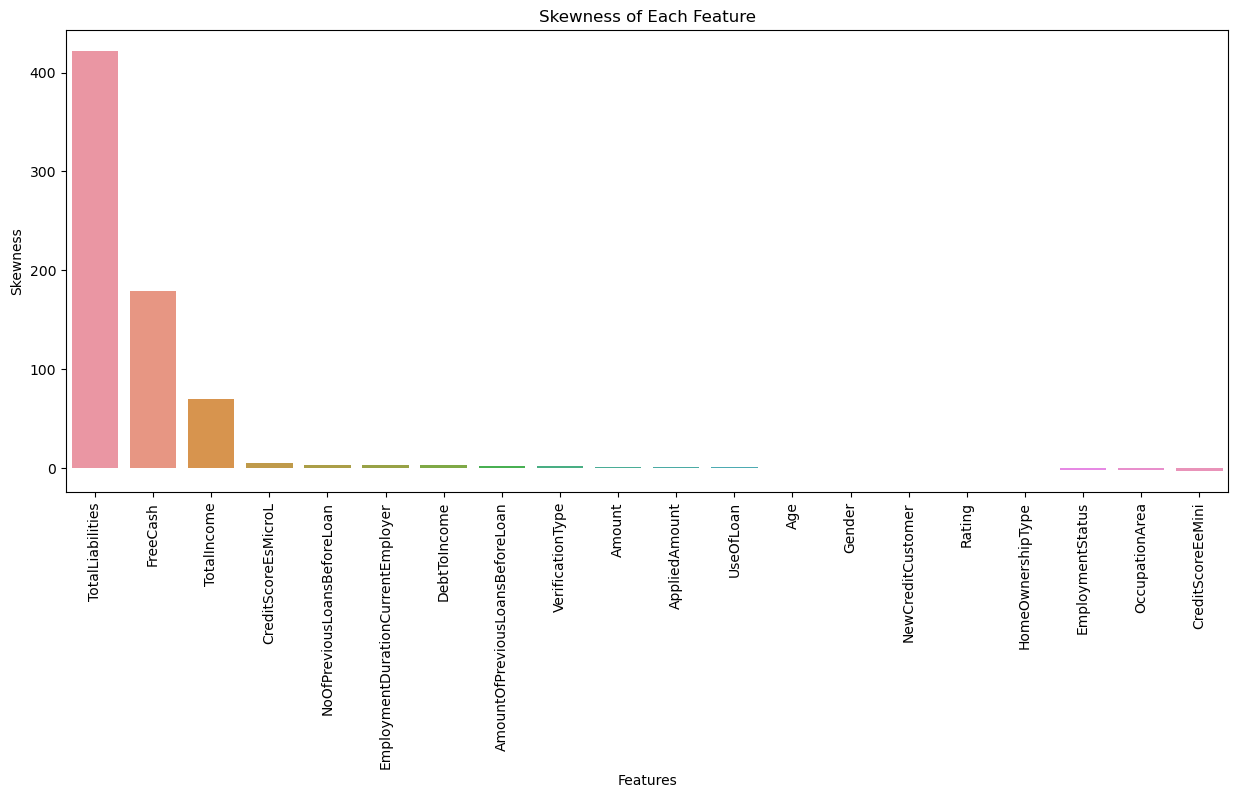

In [57]:
# Checking skewness of each  numerical column
skewed_features = loan_df.apply(lambda x: x.skew()).sort_values(ascending=False)

# Plotting the skewness values
plt.figure(figsize=(15, 6))
sns.barplot(x=skewed_features.index, y=skewed_features.values)
plt.xticks(rotation=90) 
plt.title('Skewness of Each Feature')
plt.ylabel('Skewness')
plt.xlabel('Features')
plt.show()

In [58]:
# Performing Log transformations to the columns where the skeweness is more than 2.
threshold = 2

# Selecting features to transform based on skewness
features_to_transform = skewed_features[skewed_features.abs() > threshold].index.tolist()

# Apply transformations
for column in features_to_transform:
    if skewed_features[column] > 0:
        if (loan_df[column] >= 0).all(): 
            loan_df[column] = np.log1p(loan_df[column])
        else:
            min_value = loan_df[column].min()
            loan_df[column] = loan_df[column] + abs(min_value) + 1 
            loan_df[column] = np.log1p(loan_df[column])

C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_19720\3951622523.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df[column] = np.log1p(loan_df[column])
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_19720\3951622523.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df[column] = loan_df[column] + abs(min_value) + 1
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_19720\3951622523.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

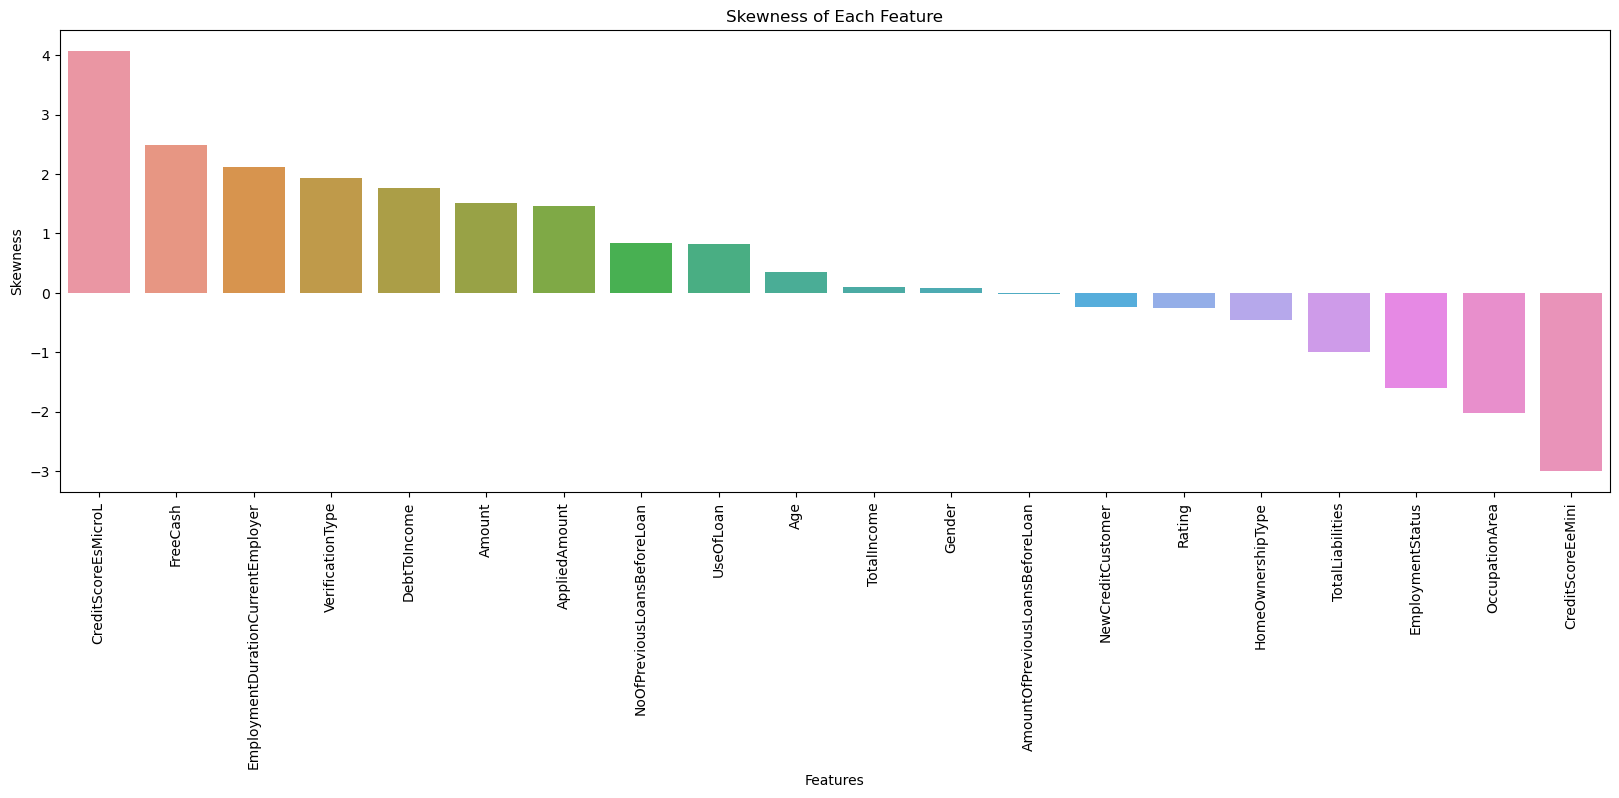

In [59]:
# Checking the skewness of each  numerical column after perfroming the transformations.
skewed_features = loan_df.apply(lambda x: x.skew()).sort_values(ascending=False)

# Plotting the skewness values.
plt.figure(figsize=(20, 6))
sns.barplot(x=skewed_features.index, y=skewed_features.values)
plt.xticks(rotation=90)  
plt.title('Skewness of Each Feature')
plt.ylabel('Skewness')
plt.xlabel('Features')
plt.show()

The skeweness is now within the threshold which is quite tolerable. This indicates that the data is now symmetric in distribution.

In [60]:
loan_df.head()

,NewCreditCustomer,VerificationType,Age,Gender,AppliedAmount,Amount,UseOfLoan,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,TotalIncome,TotalLiabilities,DebtToIncome,FreeCash,Rating,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan
0,0,0,53,0,2125.0,2125.0,7,3,0.000000,13,7,6.563856,6.214788,3.306520,7.760007,3,0.000000,1000.0,0.693147,6.216606
1,0,1,50,0,3000.0,3000.0,3,0,0.693147,17,7,7.496097,6.608608,3.452524,7.788543,2,0.000000,1000.0,0.693147,7.496097
2,1,0,44,1,10630.0,9100.0,3,0,1.791759,18,5,7.783641,6.820016,3.321793,7.894851,0,0.000000,1000.0,0.000000,0.000000
3,1,3,42,1,1500.0,1500.0,7,1,2.079442,13,4,7.454141,5.863631,2.123458,7.931454,6,1.609438,1000.0,0.000000,0.000000
4,1,0,34,0,1595.0,1090.0,10,3,0.000000,13,9,7.240650,6.854355,3.611998,7.795568,7,1.945910,1000.0,0.000000,0.000000


In [61]:
# Saving the data.
loan_df.to_csv('Cleaned_loan_amount_dataset.csv', index=False)

# Using Random Forest to understand the feature importance on the target variable which is the loan amount.

In [62]:
# Performing normalization of data using Robust Scaler.

from sklearn.preprocessing import RobustScaler
X = loan_df.drop('Amount',axis=1)
scaler = RobustScaler()  
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = loan_df[['Amount']] 
y = scaler.fit_transform(y)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


importances = model.feature_importances_

# Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

C:\Users\KRISHNA\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Feature,Importance
4,AppliedAmount,0.891452
11,TotalLiabilities,0.014823
10,TotalIncome,0.014632
15,CreditScoreEsMicroL,0.012856
2,Age,0.012246
12,DebtToIncome,0.009973
14,Rating,0.008863
18,AmountOfPreviousLoansBeforeLoan,0.007522
9,HomeOwnershipType,0.005630
1,VerificationType,0.004478


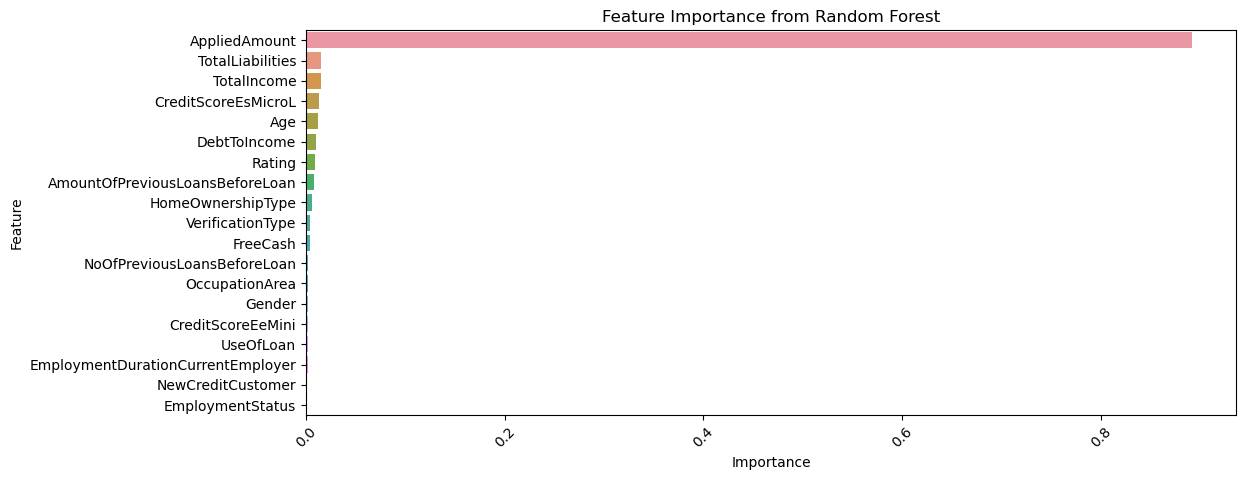

In [64]:
# Plotting the top 10 feature importances.
top_n = 20
top_features = feature_importance_df.head(top_n)
plt.figure(figsize=(12, 5))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=45) 
plt.show()